In [ ]:
!git clone https://github.com/Bhavnoor-Coders-1010/food101.git

Cloning into 'food101'...
remote: Enumerating objects: 6220, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 6220 (delta 1), reused 16 (delta 1), pack-reused 6200 (from 4)
Receiving objects: 100% (6220/6220), 169.23 MiB | 26.59 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (6256/6256), done.


In [ ]:
%cd food101

/content/food101


In [ ]:
%ls models

MobileNetV2Tuned.keras  untitled


In [13]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

In [ ]:
df = pd.read_csv('DataFOOD101/train.csv')
train_df=df.copy()
df_2 = pd.read_csv('DataFOOD101/test.csv')
test_df=df_2.copy()

print(train_df.head())

print(test_df.head())


image_folder_train = 'DataFOOD101/Train/'
image_folder_test = 'DataFOOD101/Test/'

class_names = {
  0 : "burger",
  1 : "butter_naan",
  2 : "chai",
  3 : "chapati",
  4 : "chole_bhature",
  5 : "dal_makhani",
  6 : "dhokla",
  7 : "fried_rice",
  8 : "idli",
  9 : "jalebi",
  10 : "kathi_roll",
  11 : "kadhai_paneer",
  12 : "kulfi",
  13 : "masala_dosa",
  14 : "momos",
  15 : "paani_puri",
  16 : "pakode",
  17 : "pav_bhaji",
  18 : "pizza",
  19 : "samosa"
}

for food in class_names.values():
  os.makedirs(os.path.join(image_folder_train, food), exist_ok = True)
  os.makedirs(os.path.join(image_folder_test, food), exist_ok = True)

for i, row in train_df.iterrows():
  image_path = os.path.join(image_folder_train + row["imagePath"])
  new_path = os.path.join(image_folder_train, f"{class_names[row['label']]}/" + row["imagePath"])
  if(os.path.isfile(image_path)):
    os.replace(image_path, new_path)

for i, row in test_df.iterrows():
  image_path = os.path.join(image_folder_test + row["imagePath"])
  new_path = os.path.join(image_folder_test, f"{class_names[row['label']]}/" + row["imagePath"])
  if(os.path.isfile(image_path)):
    os.replace(image_path, new_path)

  imagePath  label
0  0342.jpg      2
1  1077.jpg      0
2  2314.jpg     11
3  3068.jpg      0
4  4121.jpg     13
   Unnamed: 0 imagePath  label
0           0  0205.jpg      5
1           1  1134.jpg      3
2           2  2231.jpg      5
3           3  3401.jpg      4
4           4  4280.jpg     10


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
IMG_SIZE = (224, 224)

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   validation_split=0.2,
                                   rotation_range=30,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(image_folder_train,
                                                           target_size = IMG_SIZE,
                                                           class_mode='sparse',
                                                           batch_size = batch_size,
                                                           subset='training',
                                                           shuffle=True)

validation_generator = train_datagen.flow_from_directory(image_folder_train,
                                                           target_size = IMG_SIZE,
                                                           class_mode='sparse',
                                                           batch_size = batch_size,
                                                           subset='validation',
                                                           shuffle=True)
# test_data_augmentor = ImageDataGenerator(rescale = 1. / 255)
# test_generator = test_data_augmentor.flow_from_directory(image_folder_test,
#                                                            target_size = IMG_SIZE,
#                                                            batch_size = batch_size,
#                                                            class_mode = 'categorical')

NameError: name 'image_folder_train' is not defined

In [ ]:
class_map = train_generator.class_indices
class_map #kadhai_paneer and kathi_roll are swapped as compared to `class_names`.

{'burger': 0,
 'butter_naan': 1,
 'chai': 2,
 'chapati': 3,
 'chole_bhature': 4,
 'dal_makhani': 5,
 'dhokla': 6,
 'fried_rice': 7,
 'idli': 8,
 'jalebi': 9,
 'kadhai_paneer': 10,
 'kathi_roll': 11,
 'kulfi': 12,
 'masala_dosa': 13,
 'momos': 14,
 'paani_puri': 15,
 'pakode': 16,
 'pav_bhaji': 17,
 'pizza': 18,
 'samosa': 19}

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SIZE+(3,))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(units=128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(units=20, activation='softmax')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.callbacks import ModelCheckpoint

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint_callback = ModelCheckpoint(
    filepath='models/model_epoch_{epoch:02d}.keras',
    monitor='val_accuracy',
    save_best_only=True,
    save_freq='epoch',
)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

trained_model = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


134/134 ━━━━━━━━━━━━━━━━━━━━ 87s 533ms/step - accuracy: 0.4750 - loss: 1.9112 - val_accuracy: 0.7125 - val_loss: 1.1167
Epoch 2/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 61s 435ms/step - accuracy: 0.7643 - loss: 0.7668 - val_accuracy: 0.7505 - val_loss: 1.0047
Epoch 3/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 93s 518ms/step - accuracy: 0.8372 - loss: 0.5432 - val_accuracy: 0.7486 - val_loss: 0.9978
Epoch 4/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 70s 431ms/step - accuracy: 0.8691 - loss: 0.4327 - val_accuracy: 0.7505 - val_loss: 1.0020
Epoch 5/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 61s 429ms/step - accuracy: 0.8858 - loss: 0.3409 - val_accuracy: 0.7457 - val_loss: 1.0900
Epoch 6/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 82s 440ms/step - accuracy: 0.8898 - loss: 0.3300 - val_accuracy: 0.7457 - val_loss: 1.0869
Epoch 7/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 82s 434ms/step - accuracy: 0.8911 - loss: 0.3346 - val_accuracy: 0.7429 - val_loss: 1.1793
Epoch 8/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 61s 437ms/step - accuracy: 0.9118 - loss: 0.2723 - val

In [ ]:
untuned_model_save = model.save("models/MobileNetV2Untuned.keras")

NameError: name 'model' is not defined

In [ ]:
for layer in base_model.layers[-20:]:
  if not isinstance(layer, layers.BatchNormalization):
    layer.trainable = True

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

trained_model_tuned = model.fit(
    train_generator,
    epochs=7,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)

Epoch 1/7
134/134 ━━━━━━━━━━━━━━━━━━━━ 80s 503ms/step - accuracy: 0.9553 - loss: 0.1452 - val_accuracy: 0.7818 - val_loss: 1.1301
Epoch 2/7
134/134 ━━━━━━━━━━━━━━━━━━━━ 65s 473ms/step - accuracy: 0.9629 - loss: 0.1272 - val_accuracy: 0.7676 - val_loss: 1.2500
Epoch 3/7
134/134 ━━━━━━━━━━━━━━━━━━━━ 77s 438ms/step - accuracy: 0.9585 - loss: 0.1266 - val_accuracy: 0.7723 - val_loss: 1.2667
Epoch 4/7
134/134 ━━━━━━━━━━━━━━━━━━━━ 62s 437ms/step - accuracy: 0.9619 - loss: 0.1180 - val_accuracy: 0.7780 - val_loss: 1.1707
Epoch 5/7
134/134 ━━━━━━━━━━━━━━━━━━━━ 91s 516ms/step - accuracy: 0.9667 - loss: 0.0913 - val_accuracy: 0.7922 - val_loss: 1.1598
Epoch 6/7
134/134 ━━━━━━━━━━━━━━━━━━━━ 62s 434ms/step - accuracy: 0.9668 - loss: 0.1102 - val_accuracy: 0.7818 - val_loss: 1.1909
Epoch 7/7
134/134 ━━━━━━━━━━━━━━━━━━━━ 62s 445ms/step - accuracy: 0.9732 - loss: 0.0725 - val_accuracy: 0.7818 - val_loss: 1.2125


In [ ]:
model.save("models/MobileNetV2Tuned.keras")

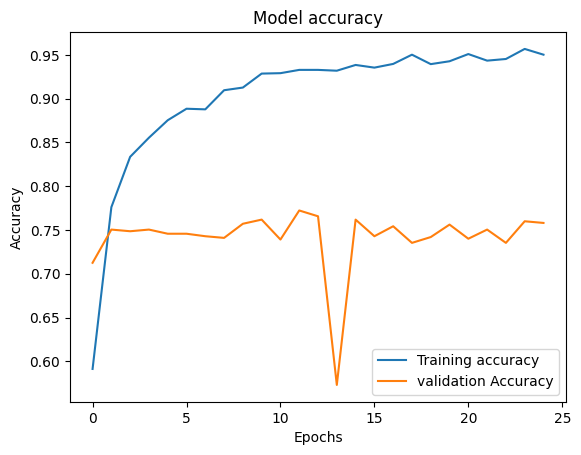

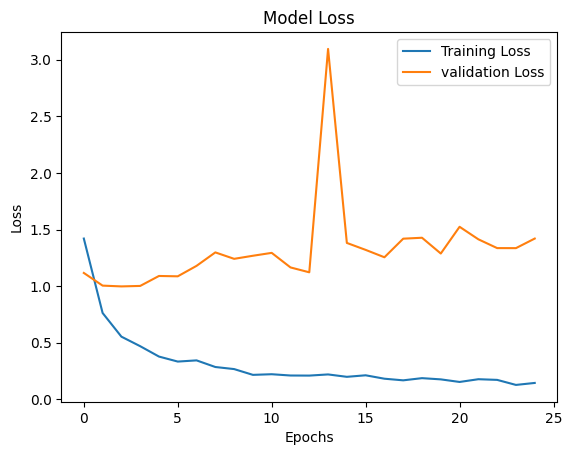

In [ ]:
plt.plot(trained_model.history['accuracy'], label="Training accuracy")
plt.plot(trained_model.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss....
plt.plot(trained_model.history['loss'], label="Training Loss")
plt.plot(trained_model.history['val_loss'], label="validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(image_folder_test,
                                                           target_size = IMG_SIZE,
                                                           class_mode='sparse',
                                                           batch_size = batch_size)

Found 939 images belonging to 20 classes.


In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow import keras

def predict(file_path, model):
  img = image.load_img(file_path, target_size=IMG_SIZE)
  img = image.img_to_array(img)
  img = img / 255.0
  img = np.expand_dims(img, axis=0)

  class_names = {0: 'burger', 1: 'butter_naan', 2: 'chai', 3: 'chapati', 4: 'chole_bhature', 5: 'dal_makhani', 6: 'dhokla', 7: 'fried_rice', 8: 'idli', 9: 'jalebi', 10: 'kadhai_paneer', 11: 'kathi_roll', 12: 'kulfi', 13: 'masala_dosa', 14: 'momos', 15: 'paani_puri', 16: 'pakode', 17: 'pav_bhaji', 18: 'pizza', 19: 'samosa'}

  prediction = model.predict(img)

  predicted_class = class_names[np.argmax(prediction)]
  return predicted_class

saved_model = keras.models.load_model("models/MobileNetV2Tuned.keras")


In [ ]:
scores = saved_model.evaluate(test_generator)
print("%s%s: %.2f%%" % ("evaluate ",saved_model.metrics_names[1], scores[1]*100))


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 181ms/step - accuracy: 0.7784 - loss: 1.0317
evaluate compile_metrics: 78.81%


In [25]:
predict("momos.jpg", saved_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'momos'